In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [20]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<Axes: xlabel='Engine HP', ylabel='MSRP'>

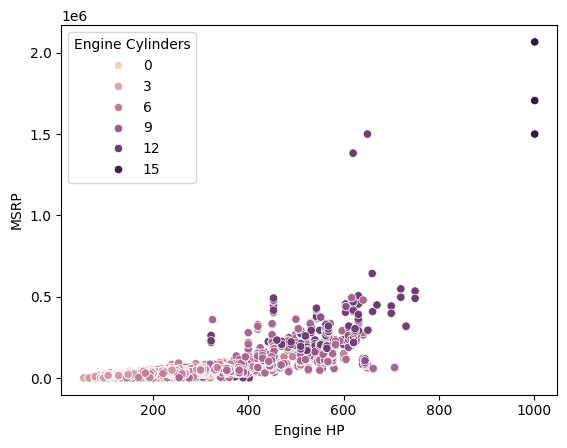

In [21]:
sns.scatterplot(data=df, x='Engine HP', y='MSRP', hue='Engine Cylinders')

<Axes: xlabel='Year', ylabel='MSRP'>

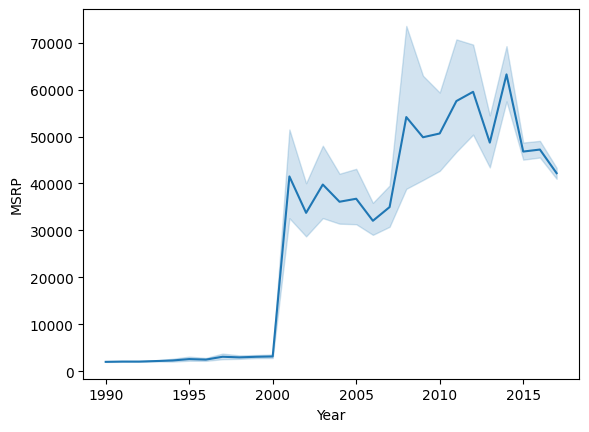

In [22]:
sns.lineplot(data=df, x='Year', y='MSRP')

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

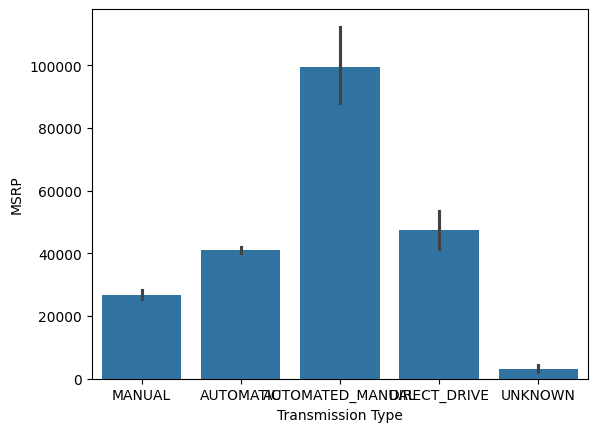

In [23]:
sns.barplot(data=df, x='Transmission Type', y='MSRP')

<Axes: xlabel='count', ylabel='Make'>

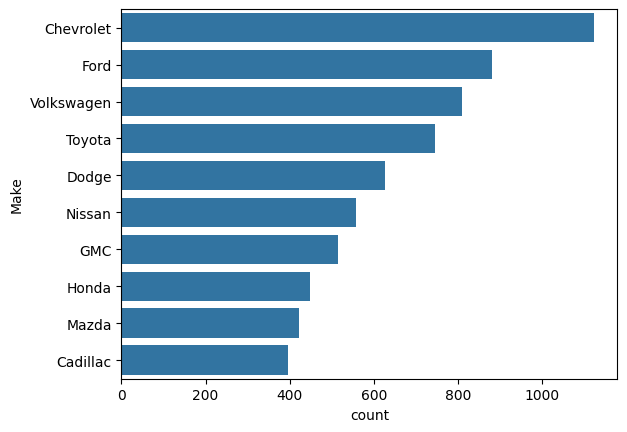

In [24]:
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().iloc[:10].index) # لأول 10 ماركات

<Axes: xlabel='count', ylabel='Make'>

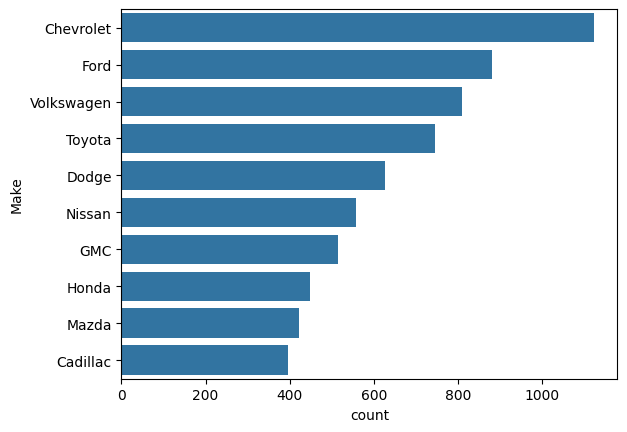

In [25]:
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().iloc[:10].index) # لأول 10 ماركات

<Axes: xlabel='Vehicle Style', ylabel='MSRP'>

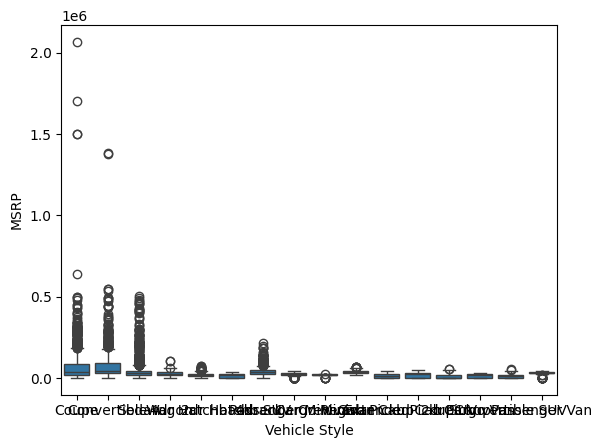

In [26]:
sns.boxplot(data=df, x='Vehicle Style', y='MSRP')

<Axes: >

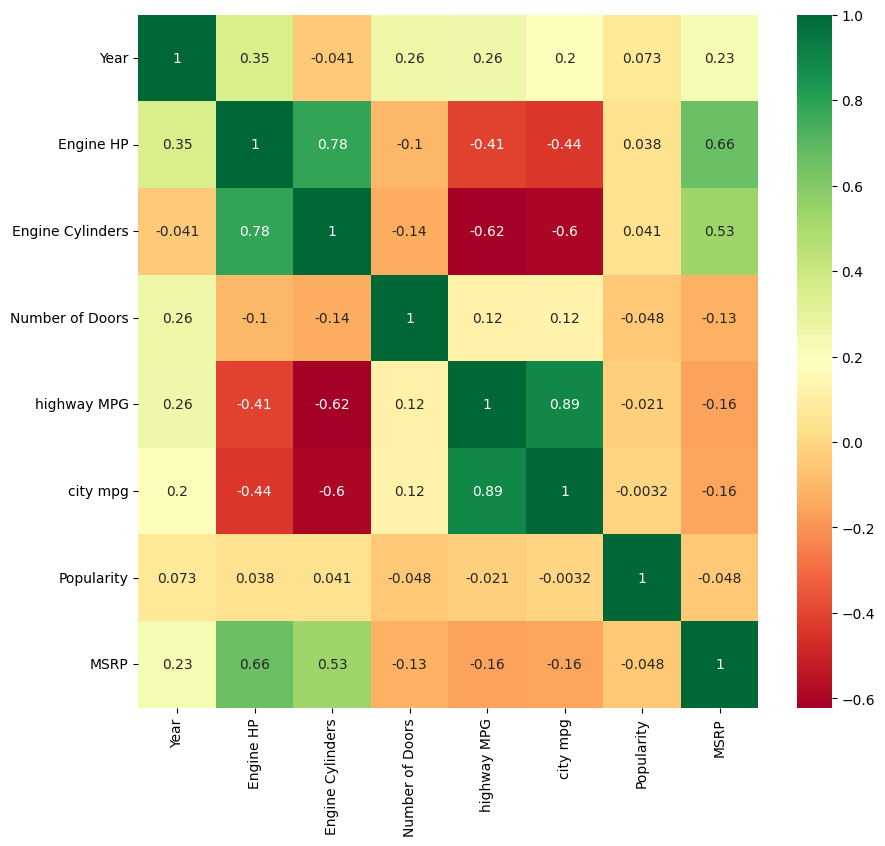

In [30]:

plt.figure(figsize=(10,9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')

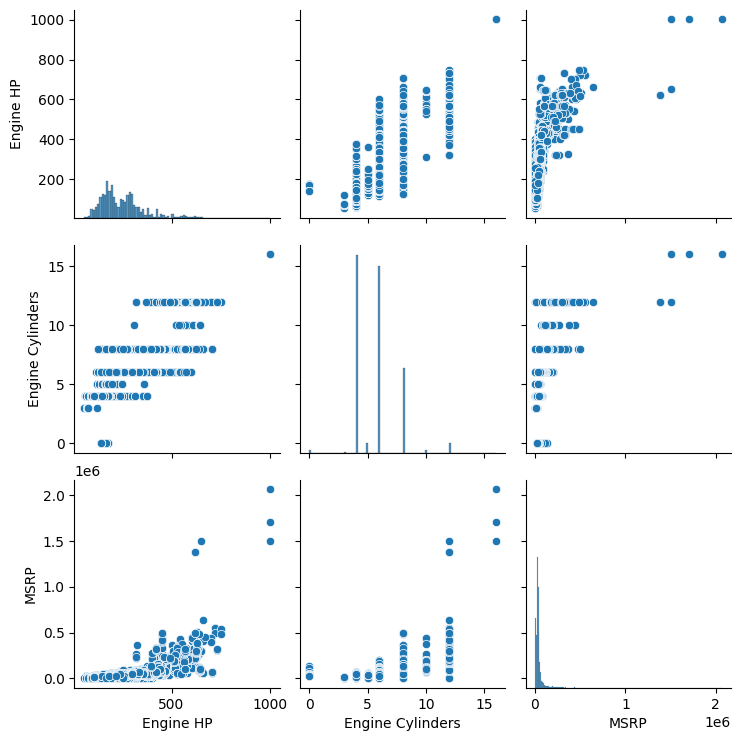

In [29]:
sns.pairplot(df[['Engine HP', 'Engine Cylinders', 'MSRP']])

> ### 👤 ALL BY HOMOSA 💻